In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #covert the timestamp to datetime
df_17nov = df[df['timestamp'].dt.date == pd.to_datetime("2025-11-17").date()].copy() #its a filter to see the 7ata on specific date
df_17nov.loc[:, 'hour'] = df_17nov['timestamp'].dt.hour #now, extract hours from timestamp column


In [3]:
#to plot the graph making a group by
hourly_pm = df_17nov.groupby('hour')[['pm10', 'pm2_5']].mean().reset_index()

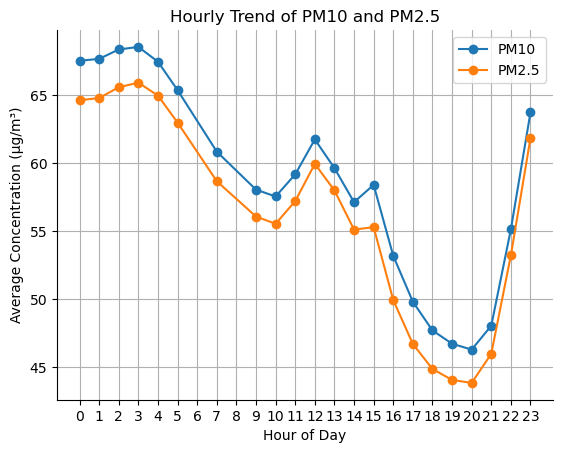

In [5]:
plt.plot(hourly_pm['hour'], hourly_pm['pm10'], marker='o', label='PM10')
plt.plot(hourly_pm['hour'], hourly_pm['pm2_5'], marker='o', label='PM2.5')

plt.xticks(range(0,24))

plt.xlabel("Hour of Day")
plt.ylabel("Average Concentration (µg/m³)")
plt.title("Hourly Trend of PM10 and PM2.5")
plt.grid(True)
plt.legend()
sns.despine()

plt.show()  #we dont have data for 6am and 8am 
